In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys

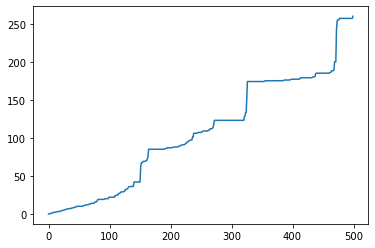

In [4]:
def load_graph_and_signals(path1, path2):
    return np.load(path1), np.load(path2)


A, signals = load_graph_and_signals('A_apr24_new_20.npy', 'probabilities_1.npy')

I = np.identity(500)

d_seq = [np.sum(row) for row in A]

D = I*d_seq

L = D - A

eigs, evecs = np.linalg.eigh(L)

plt.plot(eigs)
plt.show()
#print(eigs)
H_l = np.matmul(np.linalg.inv(I+0.5*L), signals[1:501,:])
#print(H_l)
B = np.load('B_apr24_new_20.npy')

In [5]:
def degroot(T,b):
    n=10000  # n can change
    G = nx.from_numpy_matrix(T, parallel_edges=False)
    T2 = T
    for i in range(n):
        b = T.dot(b)
        T2 = T.dot(T2)
    return T2,G,b

In [7]:
T,G,p=degroot(A[:100,:100],signals[:100,:100])

In [8]:
n = 100
m = 100
nodes = np.array(G.nodes ())

T = 100000
x = np.zeros((100,T+1))
x[:100,:100] = signals[:100,:100]
W = np.zeros((n,n,T))
for t in range(1,T+1):
    edge_chosen = random.choice(list(G.edges()))
    W[:,:,t-1] = np.eye(n)
    W[np.where(nodes== edge_chosen [0]) [0][0] ,np.where(nodes== edge_chosen [1])[0][0] ,t-1] = 1
    W[np.where(nodes== edge_chosen [1]) [0][0] ,np.where(nodes== edge_chosen [0])[0][0] ,t-1] = 1
    W[:,:,t-1] /= W[:,:,t-1]. sum(axis=1,keepdims=True)
    x[:,[t]] = W[:,:,t-1] @ x[:,[t-1]]

<ipython-input-9-b2fb2804e50a>:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('gossip.png',bbox_inches='tight')


[]

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


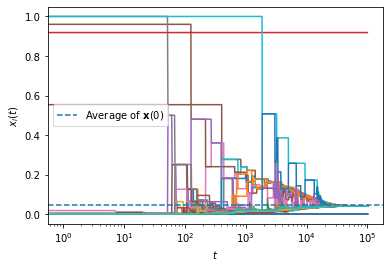

In [9]:
plt.semilogx(np.arange(T+1),x.T)
plt.axhline(x[: ,0]. mean (),linestyle='dashed',label='Average of $\mathbf{x}(0)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.legend ()
plt.savefig('gossip.png',bbox_inches='tight')
plt.plot ()

In [10]:
x[: ,0]. mean ()

0.04486527948356016

In [11]:
def DeGroot(environment, beliefs):
    i = 0
    consensus = False
    while (consensus == False and i < 1000):
        old_beliefs = beliefs
        beliefs = environment @ beliefs
        if (np.all(old_beliefs - beliefs < np.full(len(beliefs),sys.float_info.epsilon))):
            consensus = True
        i = i + 1
    return beliefs

In [12]:
DeGroot(A[:100,:100],signals[:100,:100])

array([[2.49623897e-05, 2.15746056e-05, 6.80120747e-05, ...,
        1.10073833e-04, 1.94019845e-05, 2.42833921e-05],
       [1.44949875e-02, 1.76093376e-02, 2.91960535e+00, ...,
        1.65776385e-02, 1.49266002e-02, 1.31734186e-02],
       [1.53741079e-06, 1.36362826e-06, 4.98551706e-06, ...,
        4.43531739e-06, 1.48188637e-06, 1.97812930e-06],
       ...,
       [1.04235029e+00, 4.97395383e-01, 3.16961070e+00, ...,
        3.35934443e-02, 2.73541797e-02, 2.44031026e-02],
       [1.44949875e-02, 1.76093376e-02, 2.91960535e+00, ...,
        1.65776385e-02, 1.49266002e-02, 1.31734186e-02],
       [7.36006934e-03, 2.11150778e-01, 5.37350366e-02, ...,
        1.10074469e-02, 7.68583521e-03, 7.60679181e-03]])